# Facial Emotions Recognition

In [1]:
# !pip install Keras-Preprocessing

In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIR = 'images_/train_'
TEST_DIR = 'images_/validation_'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train_demo = pd.DataFrame()
train_demo['image'], train_demo['label'] = createdataframe(TRAIN_DIR)

angry_demo completed
disgust_demo completed
fear_demo completed
happy_demo completed
neutral_demo completed
sad_demo completed
surprise_demo completed


In [6]:
print(train_demo.head())

                              image       label
0   images_/train_\angry_demo\0.jpg  angry_demo
1   images_/train_\angry_demo\1.jpg  angry_demo
2  images_/train_\angry_demo\10.jpg  angry_demo
3  images_/train_\angry_demo\22.jpg  angry_demo
4  images_/train_\angry_demo\27.jpg  angry_demo


In [7]:
validation_demo = pd.DataFrame()
validation_demo['image'], validation_demo['label'] = createdataframe(TEST_DIR)

angry_demo completed
disgust_demo completed
fear_demo completed
happy_demo completed
neutral_demo completed
sad_demo completed
surprise_demo completed


In [8]:
# print(validation_demo)
print(validation_demo['image'].head())

0    images_/validation_\angry_demo\157.jpg
1     images_/validation_\angry_demo\23.jpg
2    images_/validation_\angry_demo\245.jpg
3    images_/validation_\angry_demo\249.jpg
4     images_/validation_\angry_demo\38.jpg
Name: image, dtype: object


In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [11]:
train_features = extract_features(train_demo['image']) 

  0%|          | 0/42 [00:00<?, ?it/s]

C:\Users\HP\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [12]:
test_features = extract_features(validation_demo['image'])

  0%|          | 0/42 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train_demo['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train_demo['label'])
y_test = le.transform(validation_demo['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [22]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
1/1 [==============================] - 7s 7s/step - loss: 1.9426 - accuracy: 0.1429 - val_loss: 1.9454 - val_accuracy: 0.1429
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 1.9464 - accuracy: 0.1190 - val_loss: 1.9453 - val_accuracy: 0.1429
Epoch 3/100
1/1 [==============================] - 6s 6s/step - loss: 1.9612 - accuracy: 0.1429 - val_loss: 1.9454 - val_accuracy: 0.1429
Epoch 4/100
1/1 [==============================] - 7s 7s/step - loss: 1.9275 - accuracy: 0.2143 - val_loss: 1.9453 - val_accuracy: 0.1429
Epoch 5/100
1/1 [==============================] - 7s 7s/step - loss: 1.9440 - accuracy: 0.1905 - val_loss: 1.9453 - val_accuracy: 0.1429
Epoch 6/100
1/1 [==============================] - 7s 7s/step - loss: 1.9296 - accuracy: 0.1905 - val_loss: 1.9452 - val_accuracy: 0.1429
Epoch 7/100
1/1 [==============================] - 7s 7s/step - loss: 1.9591 - accuracy: 0.0952 - val_loss: 1.9451 - val_accuracy: 0.1429
Epoch 8/100
1/1 [=================

1/1 [==============================] - 7s 7s/step - loss: 1.9103 - accuracy: 0.2143 - val_loss: 1.9470 - val_accuracy: 0.0952
Epoch 61/100
1/1 [==============================] - 7s 7s/step - loss: 1.9179 - accuracy: 0.3333 - val_loss: 1.9469 - val_accuracy: 0.1667
Epoch 62/100
1/1 [==============================] - 7s 7s/step - loss: 1.9261 - accuracy: 0.1905 - val_loss: 1.9476 - val_accuracy: 0.1667
Epoch 63/100
1/1 [==============================] - 7s 7s/step - loss: 1.8881 - accuracy: 0.2143 - val_loss: 1.9486 - val_accuracy: 0.1429
Epoch 64/100
1/1 [==============================] - 8s 8s/step - loss: 1.8792 - accuracy: 0.2143 - val_loss: 1.9513 - val_accuracy: 0.1905
Epoch 65/100
1/1 [==============================] - 7s 7s/step - loss: 1.9193 - accuracy: 0.2143 - val_loss: 1.9520 - val_accuracy: 0.1429
Epoch 66/100
1/1 [==============================] - 7s 7s/step - loss: 1.8929 - accuracy: 0.2857 - val_loss: 1.9528 - val_accuracy: 0.0714
Epoch 67/100
1/1 [======================

# Save Model

In [39]:
model_json = model.to_json()
with open("facialemotionmodel_.json",'w') as json_file:
    json_file.write(model_json)
model.save("facialemotionmodel_.h5")

C:\Users\HP\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
from keras.models import model_from_json

In [25]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

In [26]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [27]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [30]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


C:\Users\HP\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 443ms/step
model prediction is  sad


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of sad


C:\Users\HP\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 136ms/step
model prediction is  sad


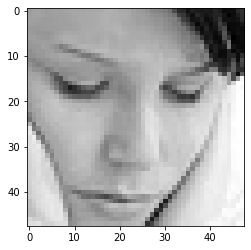

In [32]:
image = 'images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of fear
1/1 [==============================] - 0s 109ms/step
model prediction is  sad


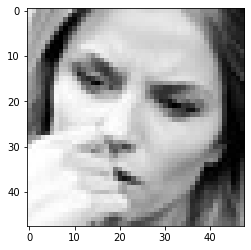

In [33]:
image = 'images/train/fear/2.jpg'
print("original image is of fear")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of happy
1/1 [==============================] - 0s 199ms/step
model prediction is  happy


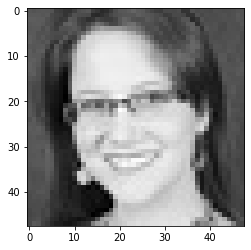

In [35]:
image = 'images/train/happy/7.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 [==============================] - 0s 107ms/step
model prediction is  surprise


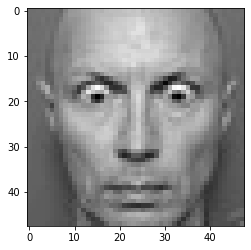

In [36]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')